In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 군집화(Clustreing) - K-Means 알고리즘

### Iris 데이터 군집화

In [13]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
iris = load_iris()
iris_std = StandardScaler().fit_transform(iris.data)

pca2 = PCA(n_components=2)
iris_pca = pca2.fit_transform(iris_std)

- K-Means 모델 생성/학습

In [15]:
from sklearn.cluster import KMeans
KMeans().get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [16]:
            # 군집화할 지점 갯수
kmeans = KMeans(n_clusters= 3, random_state = 2022)
kmeans.fit(iris_std) # 비지도학습이므로 y(label)값은 주지 않는다

KMeans(n_clusters=3, random_state=2022)

In [17]:
# 학습결과
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [19]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([53, 50, 47]))

In [23]:
df = pd.DataFrame({
    "PC1":iris_pca[:,0], "PC2" : iris_pca[:,1],
    "target":iris.target, "clusters":kmeans.labels_
})
df.head(55).tail(5)

,PC1,PC2,target,clusters
50,1.101781,0.862972,1,2
51,0.731337,0.594615,1,2
52,1.240979,0.616298,1,2
53,0.407483,-1.754404,1,0
54,1.075475,-0.208421,1,0


In [26]:
# 데이터 분포
df.groupby(["target", "clusters"])[["PC1"]].count()

PC1
target clusters     
0      1          50
1      0          39
       2          11
2      0          14
       2          36

- 군집 결과 시각화

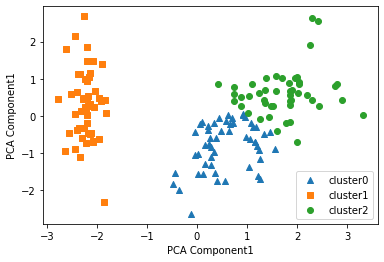

In [27]:
# PC1, PC2 시각화(품종별로 마커의 색깔과 모양을 달리해서 표현)
markers = ["^", "s", "o"]
for i, marker in enumerate(markers):
  x_data = df[df["clusters"] == i]["PC1"]
  y_data = df[df["clusters"] == i]["PC2"]
  plt.scatter(x_data, y_data, marker = marker, label = "cluster" + str(i))

plt.legend()
plt.xlabel("PCA Component1"), plt.ylabel("PCA Component1")
plt.show()


- 원본데이터와 군집화된 데이터 비교

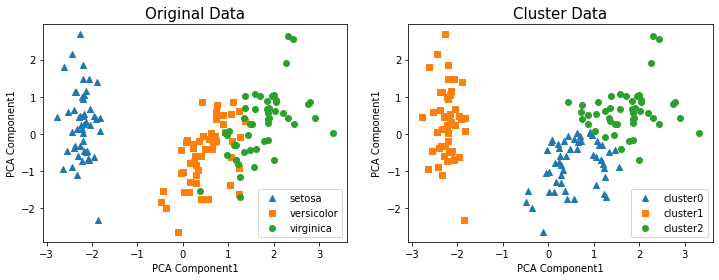

In [35]:
plt.figure(figsize=(12,4))

for k, column in enumerate(["target","clusters"]):
  plt.subplot(1,2, k+1)
  for i, marker in enumerate(markers):
    x_data = df[df[column] == i]["PC1"]
    y_data = df[df[column] == i]["PC2"]
    if k ==0:
      plt.title("Original Data", fontsize = 15)
      plt.scatter(x_data, y_data, marker = marker, label = iris.target_names[i])
    else : 
      plt.title("Cluster Data", fontsize = 15)
      plt.scatter(x_data, y_data, marker = marker, label = "cluster" + str(i))
  plt.legend()
  plt.xlabel("PCA Component1"), plt.ylabel("PCA Component1")
plt.show()